In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from tqdm import tqdm

In [7]:
pd_data = pd.read_csv('new_dataset.csv')
pd_data.shape

(447530, 37)

In [8]:
feature_list = []

for i in pd_data:
    feature_list.append(i)

In [9]:
X = pd_data.loc[:, feature_list[:-1]]
y = pd_data.loc[:, ['activity']]

In [10]:
def selectKImportance(forest, X, k=5):
     return X[:,forest.feature_importances_.argsort()[::-1][:k]]

# Tree Classifier

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=50,random_state=0)

In [27]:
y= np.ravel(y)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [20]:
#indices = indices[:-5]

In [28]:
print(importances)
print(importances.size)
print(indices)
print(indices.size)

[0.08432957 0.08530595 0.03322438 0.02157238 0.0031949  0.02784608
 0.02431585 0.02457694 0.03136654 0.06890109 0.02081814 0.01142821
 0.01783389 0.         0.0034144  0.02409586 0.01375651 0.00956158
 0.00048921 0.02350478 0.17246627 0.02859601 0.00367534 0.00506777
 0.00738275 0.02870644 0.02665584 0.03518018 0.02891066 0.0034527
 0.01179175 0.03817813 0.01218347 0.00331615 0.03315453 0.03174571]
36
[20  1  0  9 31 27  2 34 35  8 28 25 21  5 26  7  6 15 19  3 10 12 16 32
 30 11 17 24 23 22 29 14 33  4 18 13]
36


In [29]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 20 (0.172466)
2. feature 1 (0.085306)
3. feature 0 (0.084330)
4. feature 9 (0.068901)
5. feature 31 (0.038178)
6. feature 27 (0.035180)
7. feature 2 (0.033224)
8. feature 34 (0.033155)
9. feature 35 (0.031746)
10. feature 8 (0.031367)
11. feature 28 (0.028911)
12. feature 25 (0.028706)
13. feature 21 (0.028596)
14. feature 5 (0.027846)
15. feature 26 (0.026656)
16. feature 7 (0.024577)
17. feature 6 (0.024316)
18. feature 15 (0.024096)
19. feature 19 (0.023505)
20. feature 3 (0.021572)
21. feature 10 (0.020818)
22. feature 12 (0.017834)
23. feature 16 (0.013757)
24. feature 32 (0.012183)
25. feature 30 (0.011792)
26. feature 11 (0.011428)
27. feature 17 (0.009562)
28. feature 24 (0.007383)
29. feature 23 (0.005068)
30. feature 22 (0.003675)
31. feature 29 (0.003453)
32. feature 14 (0.003414)
33. feature 33 (0.003316)
34. feature 4 (0.003195)
35. feature 18 (0.000489)
36. feature 13 (0.000000)


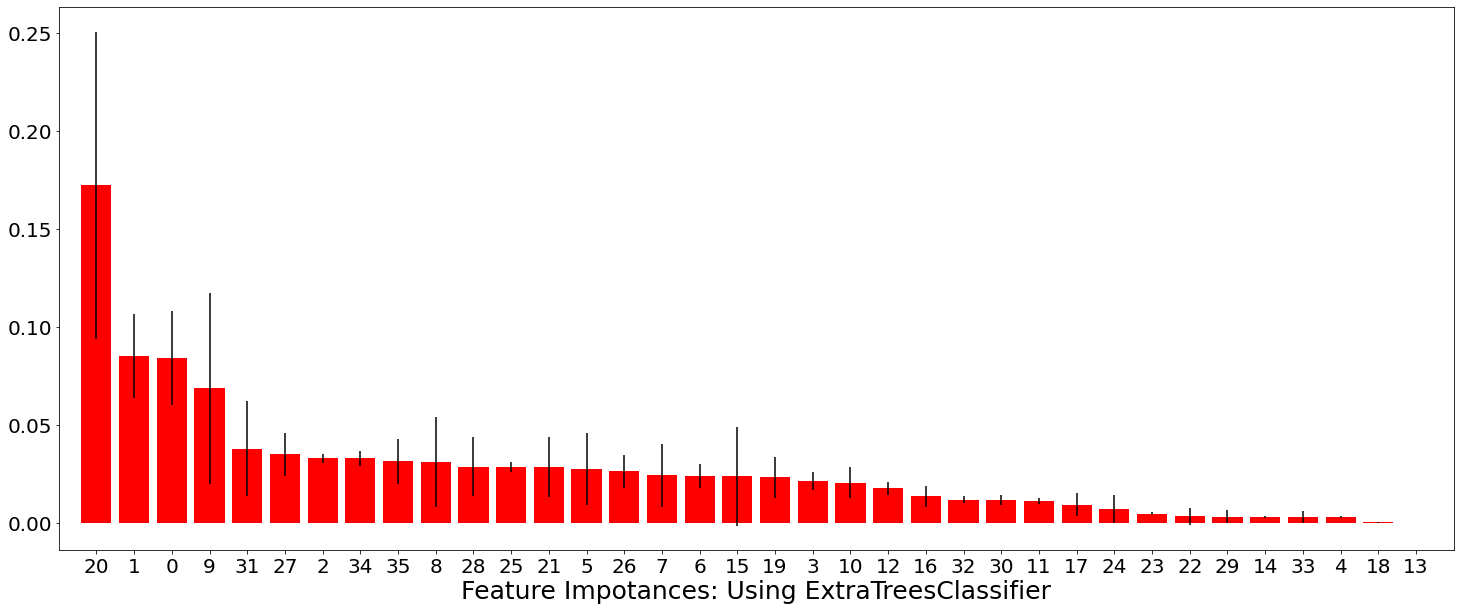

In [30]:
# Plot the feature importances of the forest
plt.figure(figsize=(25,10))
plt.title('Feature Impotances: Using ExtraTreesClassifier',y=-0.1,fontsize=25)
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.rcParams.update({'font.size': 20})

plt.savefig("ExtraTreesClassifier.png")
#plt.show()

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
forest = RandomForestClassifier(n_estimators=50)

In [33]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [34]:
# Print the feature ranking WHEN n_estimators=50
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 31 (0.155972)
2. feature 1 (0.130394)
3. feature 20 (0.102355)
4. feature 0 (0.066767)
5. feature 3 (0.045233)
6. feature 34 (0.040412)
7. feature 9 (0.035411)
8. feature 25 (0.034889)
9. feature 26 (0.032997)
10. feature 27 (0.032606)
11. feature 28 (0.026645)
12. feature 21 (0.026206)
13. feature 35 (0.024901)
14. feature 32 (0.024486)
15. feature 2 (0.022421)
16. feature 8 (0.021737)
17. feature 10 (0.020674)
18. feature 19 (0.019903)
19. feature 12 (0.015130)
20. feature 15 (0.014042)
21. feature 5 (0.014002)
22. feature 6 (0.013858)
23. feature 7 (0.012843)
24. feature 16 (0.012602)
25. feature 30 (0.010985)
26. feature 11 (0.010846)
27. feature 17 (0.009549)
28. feature 24 (0.006506)
29. feature 4 (0.003696)
30. feature 33 (0.003029)
31. feature 23 (0.002936)
32. feature 14 (0.002179)
33. feature 29 (0.001844)
34. feature 22 (0.001548)
35. feature 18 (0.000397)
36. feature 13 (0.000000)


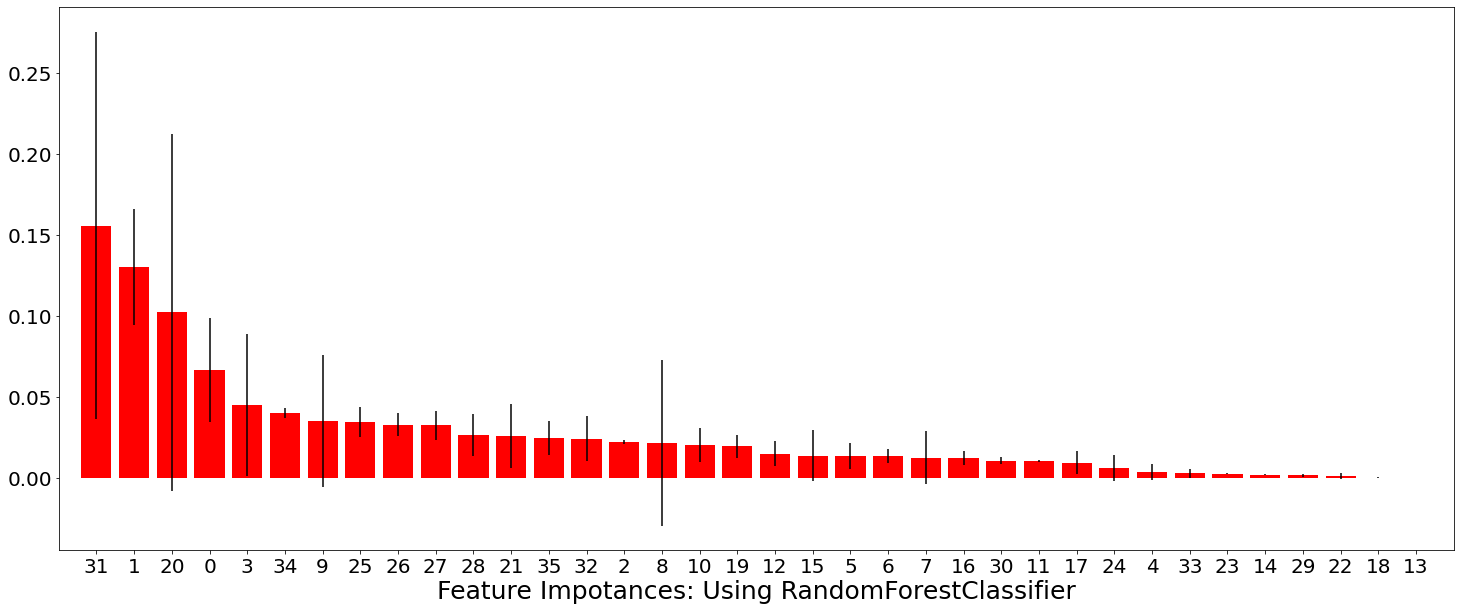

In [35]:
#Plot the feature importances of the forest
plt.figure(figsize=(25,10))
plt.title('Feature Impotances: Using RandomForestClassifier',y=-0.1,fontsize=25)
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.rcParams.update({'font.size': 20})

plt.savefig("RandomForestClassifier.png")
plt.show()

# L1-based

In [ ]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)

In [ ]:
lsvc.fit(X,y)

importances = lsvc.feature_importances_
std = np.std([tree.feature_importances_ for tree in lsvc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title('Feature Impotances: Using LinearSVC',y=-0.1,fontsize=20)
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.savefig("LinearSVC.png")
#plt.show()